# 1. Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import time



In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
from sklearn.model_selection import GridSearchCV, train_test_split
import torch

In [4]:
bank=pd.read_csv('bank.csv')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
bank.shape

(11162, 17)

In [7]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [9]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [10]:
bank['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [11]:
bank['marital'].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [12]:
bank['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [13]:
bank['default'].value_counts()

no     10994
yes      168
Name: default, dtype: int64

In [14]:
bank['housing'].value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

In [15]:
bank['loan'].value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

In [16]:
bank['contact'].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [17]:
bank['month'].value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

In [18]:
bank['campaign'].value_counts()

1     4798
2     3028
3     1321
4      771
5      378
6      265
7      139
8      128
9       72
10      52
11      40
13      30
12      29
14      15
17      14
15      13
16       9
18       8
21       8
19       5
20       5
24       5
30       4
22       4
25       3
23       3
26       3
43       2
29       2
32       2
28       1
27       1
41       1
33       1
31       1
63       1
Name: campaign, dtype: int64

In [19]:
bank['pdays'].value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 68        1
 108       1
 228       1
 268       1
 551       1
Name: pdays, Length: 472, dtype: int64

In [20]:
bank['previous'].value_counts()

0     8324
1      887
2      693
3      435
4      244
5      165
6      117
7       77
8       60
9       34
10      30
11      23
12      16
17      11
13      11
14       6
15       5
19       4
23       2
20       2
27       2
16       2
28       1
21       1
29       1
37       1
58       1
26       1
22       1
30       1
18       1
40       1
41       1
55       1
Name: previous, dtype: int64

In [21]:
bank['poutcome'].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [22]:
bank['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

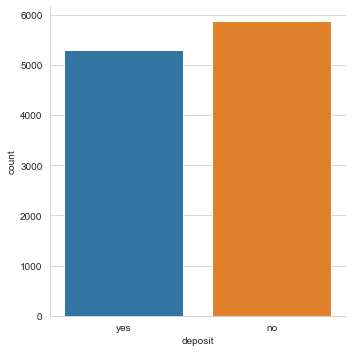

In [23]:
sns.catplot(data=bank,x='deposit',kind='count')

##### so the deposit variable is not imbalanced

## Encoding the categorical variables:

In [24]:
bank1=bank.copy()
encoder = LabelEncoder()
columns_to_encode = ['job', 'marital', 'education','default','housing','loan','contact','month','poutcome','deposit']
bank1[columns_to_encode] = bank1[columns_to_encode].apply(encoder.fit_transform)
print(bank1)

       age  job  marital  education  default  balance  housing  loan  contact  \
0       59    0        1          1        0     2343        1     0        2   
1       56    0        1          1        0       45        0     0        2   
2       41    9        1          1        0     1270        1     0        2   
3       55    7        1          1        0     2476        1     0        2   
4       54    0        1          2        0      184        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
11157   33    1        2          0        0        1        1     0        0   
11158   39    7        1          1        0      733        0     0        2   
11159   32    9        2          1        0       29        0     0        0   
11160   43    9        1          1        0        0        0     1        0   
11161   34    9        1          1        0        0        0     0        0   

       day  month  duration

### normalization:

In [25]:
columns_to_normalize=['age','balance','day','duration','campaign','pdays','previous']
bank1[columns_to_normalize] = preprocessing.normalize(bank1[columns_to_normalize])

# Normalized=preprocessing.normalize(bank1.values)
# bank1=pd.DataFrame(Normalized, columns=bank1.columns)
bank1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0.023002,0,1,1,0,0.913471,1,0,2,0.001949,8,0.406247,0.000390,-0.000390,0.000000,3,1
1,0.038127,0,1,1,0,0.030638,0,0,2,0.003404,8,0.998797,0.000681,-0.000681,0.000000,3,1
2,0.021779,9,1,1,0,0.674623,1,0,2,0.002656,8,0.737836,0.000531,-0.000531,0.000000,3,1
3,0.021625,7,1,1,0,0.973501,1,0,2,0.001966,8,0.227648,0.000393,-0.000393,0.000000,3,1
4,0.077164,0,1,2,0,0.262929,0,0,2,0.007145,8,0.961693,0.002858,-0.001429,0.000000,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.126979,1,2,0,0,0.003848,1,0,0,0.076957,0,0.988893,0.003848,-0.003848,0.000000,3,0
11158,0.052781,7,1,1,0,0.992016,0,0,2,0.021654,6,0.112329,0.005413,-0.001353,0.000000,3,0
11159,0.196326,9,2,1,0,0.177921,0,0,0,0.116569,1,0.957091,0.012270,-0.006135,0.000000,3,0
11160,0.241867,9,1,1,0,0.000000,0,1,0,0.044999,8,0.050623,0.011250,0.967468,0.028124,0,0


In [26]:
bank1.to_csv('bank1.csv', index = False)

In [27]:
#x=table2array(t(:,1:16));
#y=table2array(t(:,17:17));
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# 2. Model Implementation

In [28]:
scaler = MinMaxScaler()

# Function to prepare the data for training and test
def prepare_data(df):
    X = bank1.iloc[:, 0:-1]
    y = bank1['deposit']
    print(X)
    #X = scaler.fit_transform(X)
    #X = torch.tensor(X, dtype=torch.float32)
    #y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    X_train =np.array(X_train)
    X_test =np.array(X_test)
    y_train =np.array(y_train)
    y_test =np.array(y_test)

    return X_train, X_test, y_train, y_test
# Show the data
X_train, X_test, y_train, y_test = prepare_data(bank1)

            age  job  marital  education  default   balance  housing  loan  \
0      0.023002    0        1          1        0  0.913471        1     0   
1      0.038127    0        1          1        0  0.030638        0     0   
2      0.021779    9        1          1        0  0.674623        1     0   
3      0.021625    7        1          1        0  0.973501        1     0   
4      0.077164    0        1          2        0  0.262929        0     0   
...         ...  ...      ...        ...      ...       ...      ...   ...   
11157  0.126979    1        2          0        0  0.003848        1     0   
11158  0.052781    7        1          1        0  0.992016        0     0   
11159  0.196326    9        2          1        0  0.177921        0     0   
11160  0.241867    9        1          1        0  0.000000        0     1   
11161  0.054055    9        1          1        0  0.000000        0     0   

       contact       day  month  duration  campaign     pdays  

In [29]:
#This is for Matlab no need in Python and just need to run once
import numpy as np
#save files o csv tto work on Malab


pd.DataFrame(X_train).to_csv('x_train.csv', header = False,index = False)
pd.DataFrame(X_test).to_csv('x_test.csv', header = False,index = False)

pd.DataFrame(y_train).to_csv('y_train.csv', header = False,index = False)
pd.DataFrame(y_test).to_csv('y_test.csv', header = False,index = False)


## trying with soft max activation function and binary cross entropy loss function: 

In [30]:
# change the data in torch tensors data ype
X_train = torch.tensor(X_train,requires_grad=True, dtype = torch.float32)
X_test = torch.tensor(X_test,requires_grad=True, dtype = torch.float32)

y_train = torch.tensor(y_train, requires_grad=True,dtype = torch.float32).reshape(-1, 1)
y_test = torch.tensor(y_test, requires_grad=True, dtype = torch.float32).reshape(-1, 1)

In [31]:
X_train.shape, X_test.shape

(torch.Size([7813, 16]), torch.Size([3349, 16]))

Basline Model

In [32]:
hidden_neuron = 32
class Net(nn.Module):
    def __init__(self,input_shape):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(input_shape,hidden_neuron)
        self.fc2 = nn.Linear(hidden_neuron,1)
    def forward(self,x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

In [33]:
model = Net(input_shape=16)
criterion = nn.BCELoss() # Using binary cross-entropy loss because our task is a binary classification task
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate ) #change here

In [34]:
epoch = 1000
for epoch in range(epoch):
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    loss.backward()
    optimizer.step()

Epoch 0: train loss: 0.705094039440155
Epoch 1: train loss: 0.7020324468612671
Epoch 2: train loss: 0.6996609568595886
Epoch 3: train loss: 0.6976118683815002
Epoch 4: train loss: 0.6957922577857971
Epoch 5: train loss: 0.6941548585891724
Epoch 6: train loss: 0.692660391330719
Epoch 7: train loss: 0.6912820339202881
Epoch 8: train loss: 0.6899958252906799
Epoch 9: train loss: 0.688786506652832
Epoch 10: train loss: 0.6876438856124878
Epoch 11: train loss: 0.686556339263916
Epoch 12: train loss: 0.6855246424674988
Epoch 13: train loss: 0.6845371127128601
Epoch 14: train loss: 0.6835922002792358
Epoch 15: train loss: 0.6826817393302917
Epoch 16: train loss: 0.6818020939826965
Epoch 17: train loss: 0.680951714515686
Epoch 18: train loss: 0.6801235675811768
Epoch 19: train loss: 0.6793177723884583
Epoch 20: train loss: 0.6785314679145813
Epoch 21: train loss: 0.6777626276016235
Epoch 22: train loss: 0.6770108342170715
Epoch 23: train loss: 0.6762886643409729
Epoch 24: train loss: 0.6755813

Compare training speeds and test set accuracies using different numbers of hidden neurons and different learning rates.

In [35]:
# Stores the metric for the model configuration
metric_table = pd.DataFrame(columns=["Number of Neurons", "Learning Rate", "Training Speed", "Test Accuracy"])

In [36]:
#Learning rates
learning_rates = [0.01,0.1,1]
#Number of neurons
number_of_neurons = [9,11,13,15]
#Number of training epoch
epoch = 1000

In [37]:
#Defines the Neural Network
class Net(nn.Module):
    def __init__(self, n_neurons=12):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(16,n_neurons)
        self.fc2 = nn.Linear(n_neurons,1)
    def forward(self,x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

In [38]:
#Configuration for the different models
array = []
accuracy = []
speed = []
#Number of Hidden Neurons
for hidden_neuron in number_of_neurons:
    #Learning Rates
    for learning_rate in learning_rates:
        # Creates a new model for each configuration
        model = Net( n_neurons=hidden_neuron )
        criterion = nn.BCELoss() # Using binary cross-entropy loss because our task is a binary classification task
        optimizer = torch.optim.SGD( model.parameters(), lr=learning_rate ) # Optimizer

        # Training speed
        t = time.time()
        # Trains the model with the current configuration
        for epoch in range(epoch):
            optimizer.zero_grad()
            y_pred = model(X_train)
            loss = criterion(y_pred, y_train)
            loss.backward()
            optimizer.step()
        elapsed = time.time() - t
        array.append('Lr= '+str(learning_rate)+ ',non= '+str(hidden_neuron))
        speed.append(elapsed)
        # Gets the y prediction test
        y_pred_test = model(X_test)
        y_pred_test[y_pred_test < 0.5] = 0
        y_pred_test[y_pred_test >= 0.5] = 1

        
        # Gets the accuracy score for the model - compare the y test prediction with y true
        test_acc_score = accuracy_score(y_test.detach().numpy(), y_pred_test.detach().numpy())
        accuracy.append(test_acc_score)


        # Appends the metrics for the current model configuration
        df2 = pd.DataFrame({"Number of Neurons":  [hidden_neuron],
                            "Learning Rate": [learning_rate],
                            "Training Speed": [elapsed],
                            "Test Accuracy": [test_acc_score]})
        metric_table = metric_table.append(df2, ignore_index = True)

        # Prints the metric results for the current model configuration
        print('Hidden Neurons {}: , Learning Rate: {} , Test Accuracy: {}'.format(hidden_neuron, learning_rate,test_acc_score))




Hidden Neurons 9: , Learning Rate: 0.01 , Test Accuracy: 0.542251418333831
Hidden Neurons 9: , Learning Rate: 0.1 , Test Accuracy: 0.6392953120334428
Hidden Neurons 9: , Learning Rate: 1 , Test Accuracy: 0.6673633920573305
Hidden Neurons 11: , Learning Rate: 0.01 , Test Accuracy: 0.5374738727978501
Hidden Neurons 11: , Learning Rate: 0.1 , Test Accuracy: 0.6297402209614811
Hidden Neurons 11: , Learning Rate: 1 , Test Accuracy: 0.7079725291131681
Hidden Neurons 13: , Learning Rate: 0.01 , Test Accuracy: 0.5374738727978501
Hidden Neurons 13: , Learning Rate: 0.1 , Test Accuracy: 0.6416840848014332
Hidden Neurons 13: , Learning Rate: 1 , Test Accuracy: 0.6930426993132278
Hidden Neurons 15: , Learning Rate: 0.01 , Test Accuracy: 0.5628545834577486
Hidden Neurons 15: , Learning Rate: 0.1 , Test Accuracy: 0.6297402209614811
Hidden Neurons 15: , Learning Rate: 1 , Test Accuracy: 0.6661690056733354


In [39]:
table2 = [array,accuracy,speed]

pd.DataFrame(table2).to_csv('Python_data.csv', header = False,index = False)

In [40]:
metric_table

,Number of Neurons,Learning Rate,Training Speed,Test Accuracy
0,9,0.01,1.929735,0.542251
1,9,0.10,1.450430,0.639295
2,9,1.00,1.850490,0.667363
3,11,0.01,1.914481,0.537474
4,11,0.10,1.893554,0.629740
5,11,1.00,1.863788,0.707973
6,13,0.01,2.019807,0.537474
7,13,0.10,1.684679,0.641684
8,13,1.00,2.018541,0.693043
9,15,0.01,2.099956,0.562855


# 3. Graphs used for comparisson

In [41]:
#Matlab - test accuracies

#order
x = ['lr0.01non9', 'lr0.1non9', 'lr1non9', 'lr0.01non11', 'lr0.1non11', 'lr1non11', 'lr0.01non13', 'lr0.1non13', 'lr1non13', 'lr0.01non15', 'lr0.1non15', 'lr1non15']

mat_test_acc = [0.63473,0.49708,0.50908,0.65013,0.512116,0.49142,0.60038, 0.49131,0.49141,0.58969,0.50148,0.48912]

#Matlab - training time
mat_train_time = [4.64200,4.37247,5.48295,5.65160,5.84204, 6.97161, 6.55909, 5.84194, 5.32010, 4.74060, 6.60689, 6.68864]

table = [x,mat_test_acc,mat_train_time]

pd.DataFrame(table).to_csv('matlab_data.csv', header = False,index = False)

C:\Users\saram\AppData\Local\Temp\ipykernel_26336\3690221819.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(array, rotation=45)


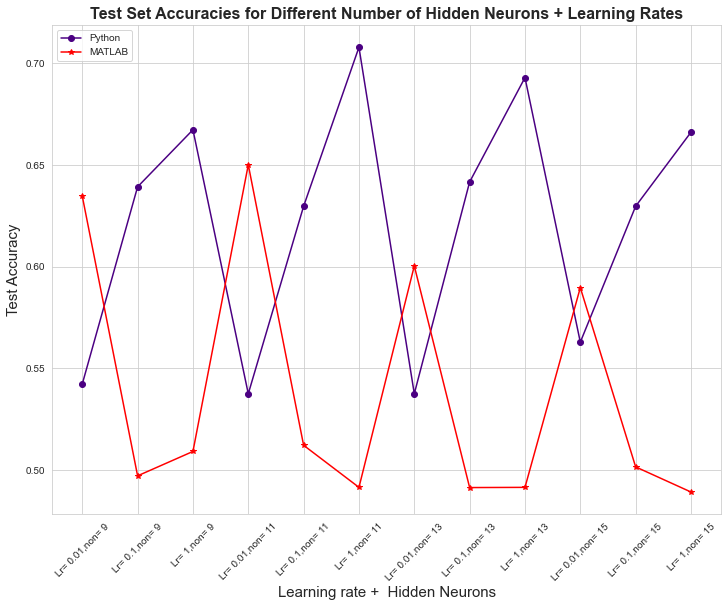

In [42]:
import matplotlib.pyplot as plt

# Create a figure
fig, ax = plt.subplots(figsize=(12, 9))

# Plot the test accuracy for each number of neurons
ax.plot(array, accuracy, marker='o',label="Python",color = '#4b0082')
ax.plot(array, mat_test_acc , marker='*', label="MATLAB", color = '#ff0000')
plt.legend(loc="upper left")
# Add labels and title
ax.set_xlabel('Learning rate +  Hidden Neurons',fontsize=15)
ax.set_ylabel('Test Accuracy',fontsize=15)
ax.set_title('Test Set Accuracies for Different Number of Hidden Neurons + Learning Rates',fontweight='bold',fontsize = 16)
ax.set_xticklabels(array, rotation=45)
plt.show()


C:\Users\saram\AppData\Local\Temp\ipykernel_26336\4152262761.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(array, rotation=45)


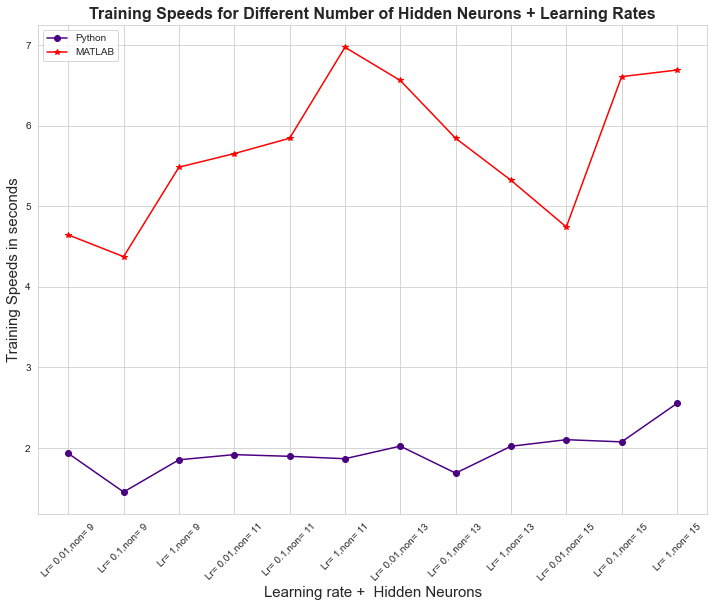

In [43]:
import matplotlib.pyplot as plt

# Create a figure
fig, ax = plt.subplots(figsize=(12, 9))

# Plot the test accuracy for each number of neurons
ax.plot(array, speed, marker='o',label="Python",color = '#4b0082')
ax.plot(array, mat_train_time, marker='*', label="MATLAB", color = '#ff0000')
plt.legend(loc="upper left")
# Add labels and title
ax.set_xlabel('Learning rate +  Hidden Neurons',fontsize=15)
ax.set_ylabel('Training Speeds in seconds',fontsize=15)
ax.set_title('Training Speeds for Different Number of Hidden Neurons + Learning Rates',fontweight='bold',fontsize = 16)
ax.set_xticklabels(array, rotation=45)
plt.show()


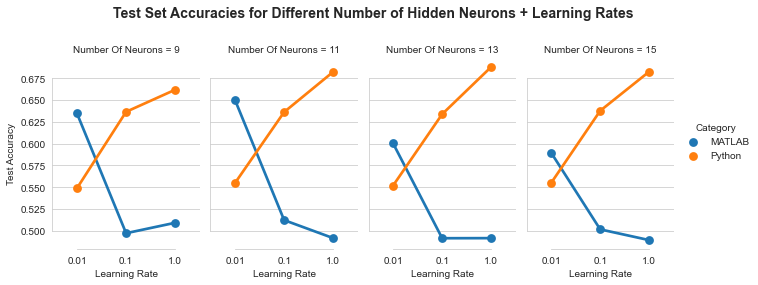

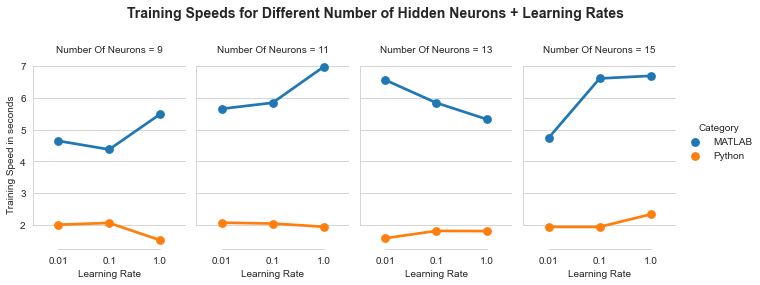

In [44]:
df = pd.read_csv("python_vs_mathlab_performance.csv")
df["Learning Rate"] = df["Learning Rate"].astype(str)
df
graph1 = sns.catplot(
    data=df, x="Learning Rate", y="Test Accuracy", col="Number Of Neurons", hue="Category",
    kind="point", height=4, aspect=.6,
)
# Set title
graph1.fig.subplots_adjust(top=0.8)  # adjust the Figure in rp
graph1.fig.suptitle('Test Set Accuracies for Different Number of Hidden Neurons + Learning Rates', fontweight='bold',
                    fontsize=14)

# Show plot
sns.despine(trim=True)
graph2 = sns.catplot(
    data=df, x="Learning Rate", y="Training Speed in seconds", col="Number Of Neurons", hue="Category",
    kind="point", height=4, aspect=.6,
)

# Set title
graph2.fig.subplots_adjust(top=0.8)  # adjust the Figure in rp
graph2.fig.suptitle('Training Speeds for Different Number of Hidden Neurons + Learning Rates', fontweight='bold',
                    fontsize=14)

# Show plot
sns.despine(trim=True)